In [1]:
#%matplotlib notebook
import os
import sys
sys.path.append("numpy_path")
import numpy as np
import struct
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop
import keras.callbacks as cb
from keras.callbacks import EarlyStopping, ModelCheckpoint
from math import cos, sin, pi
import math
from statistics import mean
import os.path

shape_size = 48

# define loss history
class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

#plot losses
def plot_losses(losses):
    plt.plot(losses)
    plt.title('Loss per batch')
    plt.show()

def feature_scaling(X):
    X = X.T
    for i in range(7):
        mean = X[i].mean()
        std = X[i].std()
        X[i] = [(x - mean)/std for x in X[i]]
    return X.T

# input dimension
dim = 200

def init_model():
    model = Sequential()
    model.add(Dense(10, input_dim=dim))
    model.add(Activation('relu'))
    model.add(Dense(20))
    model.add(Activation('relu'))
    model.add(Dense(30))
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dense(80))
    model.add(Activation('relu'))
    model.add(Dense(100))
    model.add(Activation('relu'))
    model.add(Dense(80))
    model.add(Activation('relu'))
    model.add(Dense(40))
    model.add(Activation('relu'))
    model.add(Dense(30))
    model.add(Activation('relu'))
    model.add(Dense(20))
    model.add(Activation('relu'))
    model.add(Dense(6))
    model.add(Activation('sigmoid'))
    # use mean squared error to measure the looses
    model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adam(lr = 0.001),
              metrics=['accuracy'])
    return model

Using TensorFlow backend.


In [33]:
data_size = 0
dummy1 = [0]*200
dummy2 = [0]*6
SP = np.array(np.reshape(dummy1, (1, 200)))
SH = np.array(np.reshape(dummy2, (1, 6)))
for i in range(2, 40):
    path = 'meep_code/data/DATA'+str(i)
    if not os.path.exists(path):
        #miss.append(i)
        print('Missing batch:' + str(i))
        continue
        
    files = next(os.walk(path))[2] #dir is your directory path as string]
    num_data = len(files)
    data_size += num_data
    skip = []
    
    coordinates = np.genfromtxt('meep_code/data/DATA'+str(i)+'_sh.txt')
    xc, yc = coordinates[:, 0], coordinates[:, 1]
    xc = np.reshape(xc, (num_data, shape_size))
    yc = np.reshape(yc, (num_data, shape_size))
    
    for j in range(num_data):
        tmp = np.genfromtxt(path+'/'+'DATA'+str(i)+'_sp'+str(j)+'.txt')
        valid = True
        for q in range(200):       
            if tmp[q] > 3:
                print('Batch '+str(i)+'\tsample '+str(j)+' has extreme value')
                valid = False
                break
        if not valid:
            #skip.append(j)
            continue
        SP = np.concatenate((SP, np.reshape(tmp, (1, 200))))
        tmp = []
        for q in range(6):
            tmp.append(math.sqrt(xc[j][q]**2 + yc[j][q]**2))
        SH = np.concatenate((SH, np.reshape(np.array(tmp), (1, 6))))
        #print(SP.shape)
    #print(files)
#     coordinates = np.genfromtxt('meep_code/data/DATA'+str(i)+'_sh.txt')
#     xc, yc = coordinates[:, 0], coordinates[:, 1]
#     xc = np.reshape(xc, (num_data, shape_size))
#     yc = np.reshape(yc, (num_data, shape_size))
#     for j in range(num_data):
#         if j in skip:
#             continue
#         tmp = []
#         for q in range(6):
#             tmp.append(math.sqrt(xc[j][q]**2 + yc[j][q]**2))
#         SH = np.concatenate((SH, np.reshape(np.array(tmp), (1, 6))))
    print('Batch '+str(i)+' has \t'+str(num_data)) 
#     freq = np.genfromtxt('meep_code/data/freq.txt')   
#     for j in range(num_data):
#         print(j)
#         plt.ylim(0, 1.1)
#         plt.plot(freq, SP[data_size - num_data + j + 1])
#         plt.show()
#         plt.axis('equal')
#         plt.ylim(-0.5, 0.5)
#         plt.xlim(-0.5, 0.5)
#         plt.plot(xc[j], yc[j])
#         plt.fill(xc[j], yc[j])
#         plt.show()
distribution = []
print('Total # of data: ' + str(len(SP)))
x = np.genfromtxt('meep_code/data/SP_xaxis.txt')
SP_F, SH_F = np.reshape(SP[1], (1, 200)),np.reshape(SH[1], (1, 6))
for i in range(2, len(SP)):
    peak = 0
    p_index = 0
    p_pos = [(0,0),(0,0)]
    for j in range(1, 200):
        if SP[i][j] < SP[i][p_index]:
            p_index = j
        if SP[i][j - 1] >= 0.6 >=SP[i][j]:
            peak += 1
            p_pos = [((j-1)/2+200,SP[i][j - 1]), (j/2+200, SP[i][j])]
    if peak == 1:
        distribution.append([1,p_index])
        SP_F = np.concatenate((SP_F, np.reshape(SP[i], (1, 200))))
        SH_F = np.concatenate((SH_F, np.reshape(SH[i], (1, 6))))
        
#         plt.ylim(0, 1.1)
#         plt.plot(x, SP[i])
#         plt.plot(p_pos[0][0], p_pos[0][1])
#         plt.plot(p_pos[1][0], p_pos[1][1])
#         plt.show()
#         print(p_pos[0][0], p_pos[0][1])
#         print(p_pos[1][0], p_pos[1][1])

# filt = [6,12,23,24,43,71,72,69,67,72,*[x for x in range(75, 81)],89,*[x for x in range(97, 102)]
#        ,109,110,114,127,*[x for x in range(154, 160)]
#        ,163,168,178,179,180,181,195,196,202,207,216,217,230
#        ,287,312,*[x for x in range(314, 321)],*[x for x in range(343, 349)], 362,369,375,386,388]
# SP_F, SH_F = np.reshape(SP[0], (1, 200)),np.reshape(SH[0], (1, 6))
# for i in range(1, len(SP)):
#     #print(i)
#     if i in filt:
#         continue
#     SP_F = np.concatenate((SP_F, np.reshape(SP[i], (1, 200))))
#     SH_F = np.concatenate((SH_F, np.reshape(SH[i], (1, 6))))

Batch 2 has 	7
Batch 3 has 	6
Batch 4 has 	17
Batch 5 has 	5
Batch 6 has 	14
Batch 7 has 	14
Batch 8 has 	40
Batch 9 has 	5
Batch 10 has 	14
Batch 11 has 	14
Batch 12 has 	40
Batch 13 has 	13
Batch 14 has 	37
Batch 15 has 	37
Missing batch:16
Batch 17 has 	5
Batch 18 has 	14
Batch 19 has 	14
Batch 20 has 	40
Batch 21 has 	13
Batch 22 has 	37
Batch 23 has 	37
Batch 24 has 	106
Batch 25 has 	13
Batch 26 has 	37
Batch 27 has 	37
Batch 28 has 	106
Batch 29 has 	35
Batch 30 has 	100
Batch 31 has 	100
Batch 32 has 	287
Batch 33 has 	5
Batch 34 has 	14
Batch 35 has 	14
Batch 36 has 	40
Batch 37 has 	13
Batch 38 has 	37
Batch 39 has 	37
Total # of data: 1405


In [34]:
distribution

[[1, 164],
 [1, 52],
 [1, 189],
 [1, 164],
 [1, 148],
 [1, 52],
 [1, 150],
 [1, 187],
 [1, 147],
 [1, 198],
 [1, 146],
 [1, 198],
 [1, 186],
 [1, 165],
 [1, 146],
 [1, 131],
 [1, 152],
 [1, 199],
 [1, 141],
 [1, 63],
 [1, 139],
 [1, 196],
 [1, 157],
 [1, 138],
 [1, 142],
 [1, 169],
 [1, 199],
 [1, 176],
 [1, 139],
 [1, 78],
 [1, 140],
 [1, 178],
 [1, 186],
 [1, 138],
 [1, 168],
 [1, 142],
 [1, 74],
 [1, 138],
 [1, 156],
 [1, 137],
 [1, 139],
 [1, 199],
 [1, 160],
 [1, 173],
 [1, 136],
 [1, 199],
 [1, 134],
 [1, 194],
 [1, 182],
 [1, 136],
 [1, 199],
 [1, 176],
 [1, 159],
 [1, 193],
 [1, 174],
 [1, 182],
 [1, 172],
 [1, 153],
 [1, 135],
 [1, 199],
 [1, 149],
 [1, 181],
 [1, 194],
 [1, 138],
 [1, 60],
 [1, 179],
 [1, 136],
 [1, 178],
 [1, 158],
 [1, 185],
 [1, 192],
 [1, 153],
 [1, 135],
 [1, 183],
 [1, 188],
 [1, 139],
 [1, 149],
 [1, 168],
 [1, 178],
 [1, 143],
 [1, 184],
 [1, 149],
 [1, 195],
 [1, 172],
 [1, 135],
 [1, 147],
 [1, 148],
 [1, 71],
 [1, 140],
 [1, 178],
 [1, 149],
 [1, 1

In [41]:
distribution = np.array(distribution)

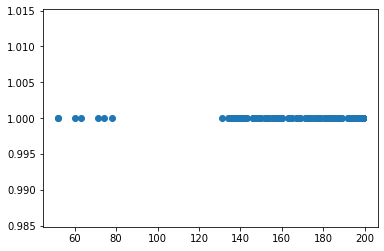

In [43]:
plt.scatter(distribution[:,1],distribution[:,0])

In [15]:
DATA = np.append(SP_F, SH_F, axis = 1)
np.random.shuffle(DATA)

X = DATA[:, :200]
Y = DATA[:,200:]
X = np.subtract(X, 0.5)
#keras.utils.normalize(X)

train_size = int(len(DATA) * 0.8)

train_X = X[0:train_size, :]
train_Y = Y[0:train_size, :]
test_X = X[train_size:, :]
test_Y = Y[train_size:, :]

Train on 107 samples, validate on 27 samples
Epoch 1/500
 - 4s - loss: 0.0930 - acc: 0.1308 - val_loss: 0.0633 - val_acc: 0.3333
Epoch 2/500
 - 0s - loss: 0.0281 - acc: 0.3458 - val_loss: 0.0133 - val_acc: 0.3333
Epoch 3/500
 - 0s - loss: 0.0092 - acc: 0.2243 - val_loss: 0.0054 - val_acc: 0.1852
Epoch 4/500
 - 0s - loss: 0.0044 - acc: 0.2523 - val_loss: 0.0024 - val_acc: 0.3333
Epoch 5/500
 - 0s - loss: 0.0035 - acc: 0.3458 - val_loss: 0.0020 - val_acc: 0.3333
Epoch 6/500
 - 0s - loss: 0.0028 - acc: 0.2336 - val_loss: 0.0020 - val_acc: 0.1481
Epoch 7/500
 - 0s - loss: 0.0027 - acc: 0.1402 - val_loss: 0.0017 - val_acc: 0.1481
Epoch 8/500
 - 0s - loss: 0.0026 - acc: 0.1308 - val_loss: 0.0017 - val_acc: 0.1852
Epoch 9/500
 - 0s - loss: 0.0025 - acc: 0.1308 - val_loss: 0.0017 - val_acc: 0.0370
Epoch 10/500
 - 0s - loss: 0.0025 - acc: 0.1495 - val_loss: 0.0017 - val_acc: 0.1852
Epoch 11/500
 - 0s - loss: 0.0025 - acc: 0.1215 - val_loss: 0.0017 - val_acc: 0.1852
Epoch 12/500
 - 0s - loss: 0.

Epoch 97/500
 - 0s - loss: 0.0023 - acc: 0.2336 - val_loss: 0.0016 - val_acc: 0.1852
Epoch 98/500
 - 0s - loss: 0.0023 - acc: 0.1402 - val_loss: 0.0017 - val_acc: 0.1111
Epoch 99/500
 - 0s - loss: 0.0023 - acc: 0.1121 - val_loss: 0.0017 - val_acc: 0.1852
Epoch 100/500
 - 0s - loss: 0.0024 - acc: 0.2523 - val_loss: 0.0016 - val_acc: 0.1481
Epoch 101/500
 - 0s - loss: 0.0024 - acc: 0.1402 - val_loss: 0.0017 - val_acc: 0.1481
Epoch 102/500
 - 0s - loss: 0.0024 - acc: 0.1963 - val_loss: 0.0017 - val_acc: 0.0741
Epoch 103/500
 - 0s - loss: 0.0024 - acc: 0.1308 - val_loss: 0.0017 - val_acc: 0.1852
Epoch 104/500
 - 0s - loss: 0.0023 - acc: 0.1495 - val_loss: 0.0016 - val_acc: 0.1111
Epoch 105/500
 - 0s - loss: 0.0023 - acc: 0.1963 - val_loss: 0.0016 - val_acc: 0.1111
Epoch 106/500
 - 0s - loss: 0.0023 - acc: 0.1402 - val_loss: 0.0017 - val_acc: 0.1852
Epoch 107/500
 - 0s - loss: 0.0023 - acc: 0.1963 - val_loss: 0.0017 - val_acc: 0.1852
Epoch 108/500
 - 0s - loss: 0.0024 - acc: 0.1308 - val_lo

Epoch 193/500
 - 0s - loss: 0.0014 - acc: 0.2617 - val_loss: 0.0018 - val_acc: 0.3333
Epoch 194/500
 - 0s - loss: 0.0015 - acc: 0.2710 - val_loss: 0.0018 - val_acc: 0.1852
Epoch 195/500
 - 0s - loss: 0.0015 - acc: 0.2617 - val_loss: 0.0018 - val_acc: 0.1481
Epoch 196/500
 - 0s - loss: 0.0015 - acc: 0.2243 - val_loss: 0.0018 - val_acc: 0.1111
Epoch 197/500
 - 0s - loss: 0.0015 - acc: 0.3271 - val_loss: 0.0018 - val_acc: 0.1111
Epoch 198/500
 - 0s - loss: 0.0014 - acc: 0.2523 - val_loss: 0.0018 - val_acc: 0.1481
Epoch 199/500
 - 0s - loss: 0.0014 - acc: 0.3084 - val_loss: 0.0019 - val_acc: 0.3704
Epoch 200/500
 - 0s - loss: 0.0015 - acc: 0.2336 - val_loss: 0.0018 - val_acc: 0.1481
Epoch 201/500
 - 0s - loss: 0.0014 - acc: 0.2804 - val_loss: 0.0018 - val_acc: 0.1111
Epoch 202/500
 - 0s - loss: 0.0014 - acc: 0.3364 - val_loss: 0.0018 - val_acc: 0.1111
Epoch 203/500
 - 0s - loss: 0.0014 - acc: 0.3271 - val_loss: 0.0019 - val_acc: 0.2222
Epoch 204/500
 - 0s - loss: 0.0015 - acc: 0.2804 - val

Epoch 289/500
 - 0s - loss: 0.0012 - acc: 0.2617 - val_loss: 0.0021 - val_acc: 0.1481
Epoch 290/500
 - 0s - loss: 0.0012 - acc: 0.2710 - val_loss: 0.0023 - val_acc: 0.2222
Epoch 291/500
 - 0s - loss: 0.0011 - acc: 0.2710 - val_loss: 0.0021 - val_acc: 0.1852
Epoch 292/500
 - 0s - loss: 0.0010 - acc: 0.2991 - val_loss: 0.0021 - val_acc: 0.0741
Epoch 293/500
 - 0s - loss: 0.0011 - acc: 0.2617 - val_loss: 0.0022 - val_acc: 0.1852
Epoch 294/500
 - 0s - loss: 0.0010 - acc: 0.2804 - val_loss: 0.0022 - val_acc: 0.1481
Epoch 295/500
 - 0s - loss: 0.0010 - acc: 0.2804 - val_loss: 0.0022 - val_acc: 0.1481
Epoch 296/500
 - 0s - loss: 0.0010 - acc: 0.3458 - val_loss: 0.0024 - val_acc: 0.1852
Epoch 297/500
 - 0s - loss: 0.0011 - acc: 0.2897 - val_loss: 0.0022 - val_acc: 0.1852
Epoch 298/500
 - 0s - loss: 0.0011 - acc: 0.2897 - val_loss: 0.0021 - val_acc: 0.1481
Epoch 299/500
 - 0s - loss: 0.0011 - acc: 0.2617 - val_loss: 0.0023 - val_acc: 0.1111
Epoch 300/500
 - 0s - loss: 0.0011 - acc: 0.2710 - val

Epoch 382/500
 - 0s - loss: 9.4087e-04 - acc: 0.3364 - val_loss: 0.0022 - val_acc: 0.1852
Epoch 383/500
 - 0s - loss: 9.7410e-04 - acc: 0.2804 - val_loss: 0.0023 - val_acc: 0.2222
Epoch 384/500
 - 0s - loss: 9.5944e-04 - acc: 0.3645 - val_loss: 0.0023 - val_acc: 0.1852
Epoch 385/500
 - 0s - loss: 9.7569e-04 - acc: 0.4019 - val_loss: 0.0022 - val_acc: 0.1111
Epoch 386/500
 - 0s - loss: 0.0011 - acc: 0.3458 - val_loss: 0.0023 - val_acc: 0.1852
Epoch 387/500
 - 0s - loss: 9.4563e-04 - acc: 0.3178 - val_loss: 0.0024 - val_acc: 0.2593
Epoch 388/500
 - 0s - loss: 8.9558e-04 - acc: 0.3458 - val_loss: 0.0022 - val_acc: 0.1481
Epoch 389/500
 - 0s - loss: 9.6433e-04 - acc: 0.3084 - val_loss: 0.0023 - val_acc: 0.1852
Epoch 390/500
 - 0s - loss: 9.1189e-04 - acc: 0.3458 - val_loss: 0.0023 - val_acc: 0.1852
Epoch 391/500
 - 0s - loss: 9.3238e-04 - acc: 0.2523 - val_loss: 0.0023 - val_acc: 0.2222
Epoch 392/500
 - 0s - loss: 0.0010 - acc: 0.3084 - val_loss: 0.0023 - val_acc: 0.1852
Epoch 393/500
 - 0

Epoch 474/500
 - 0s - loss: 7.6013e-04 - acc: 0.3645 - val_loss: 0.0021 - val_acc: 0.1852
Epoch 475/500
 - 0s - loss: 7.4080e-04 - acc: 0.3738 - val_loss: 0.0023 - val_acc: 0.3333
Epoch 476/500
 - 0s - loss: 7.7064e-04 - acc: 0.3364 - val_loss: 0.0021 - val_acc: 0.1852
Epoch 477/500
 - 0s - loss: 7.4657e-04 - acc: 0.2991 - val_loss: 0.0021 - val_acc: 0.1852
Epoch 478/500
 - 0s - loss: 7.8401e-04 - acc: 0.3925 - val_loss: 0.0024 - val_acc: 0.0741
Epoch 479/500
 - 0s - loss: 7.4810e-04 - acc: 0.3551 - val_loss: 0.0023 - val_acc: 0.1852
Epoch 480/500
 - 0s - loss: 8.3505e-04 - acc: 0.3458 - val_loss: 0.0022 - val_acc: 0.2222
Epoch 481/500
 - 0s - loss: 9.4828e-04 - acc: 0.3832 - val_loss: 0.0024 - val_acc: 0.2222
Epoch 482/500
 - 0s - loss: 8.9313e-04 - acc: 0.3832 - val_loss: 0.0024 - val_acc: 0.2593
Epoch 483/500
 - 0s - loss: 8.9398e-04 - acc: 0.2710 - val_loss: 0.0021 - val_acc: 0.1111
Epoch 484/500
 - 0s - loss: 8.5447e-04 - acc: 0.3178 - val_loss: 0.0022 - val_acc: 0.1852
Epoch 485/

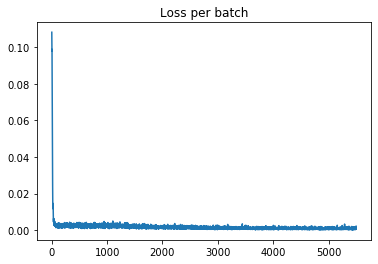

In [16]:
model = init_model()
history = LossHistory()
# when training, using minibatch seems to be pretty good
model.fit(train_X, train_Y, epochs=500, batch_size=10,
                callbacks=[history],
                validation_data=(test_X, test_Y), verbose=2)
score = model.evaluate(test_X, test_Y, batch_size=20)
print(score)
plot_losses(history.losses)

Test 0
True shape: [0.2        0.19507534 0.19507534 0.2        0.2        0.19753767]
Predicted shape: [[0.18889648 0.19220817 0.20235068 0.19841123 0.19872138 0.1904945 ]]



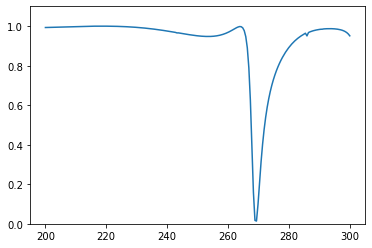

Test 1
True shape: [0.1902113  0.19258231 0.2        0.19507534 0.19507534 0.2       ]
Predicted shape: [[0.18238452 0.18628213 0.19892329 0.19177374 0.19543026 0.18742292]]



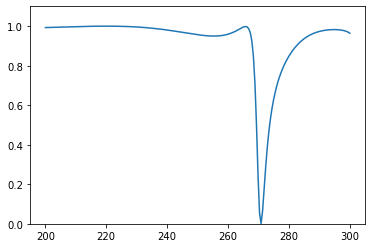

Test 2
True shape: [0.09876883 0.1        0.2        0.3        0.2        0.2       ]
Predicted shape: [[0.21186525 0.21368363 0.20864281 0.17935243 0.14165486 0.12796003]]



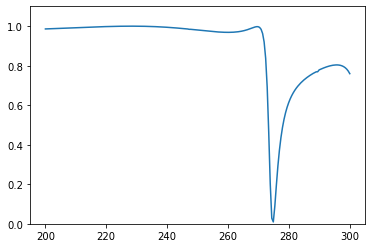

Test 3
True shape: [0.19753767 0.2        0.2        0.1        0.2        0.3       ]
Predicted shape: [[0.15039492 0.15053815 0.18833801 0.20319405 0.21673857 0.17947456]]



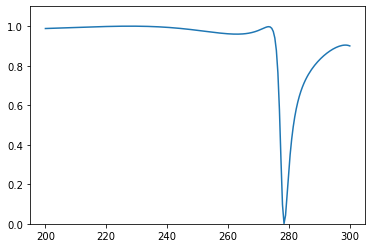

Test 4
True shape: [0.1618034  0.1638203  0.17013016 0.1815962  0.2        0.1       ]
Predicted shape: [[0.19190949 0.1867834  0.15412867 0.18980521 0.15419918 0.15177277]]



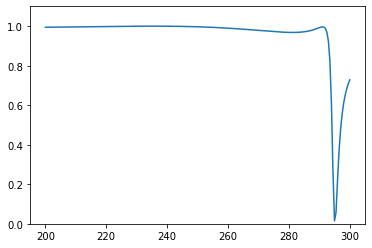

Test 5
True shape: [0.1902113  0.19258231 0.2        0.13169178 0.1        0.2       ]
Predicted shape: [[0.17683199 0.18192759 0.18052721 0.15026143 0.15119725 0.14264299]]



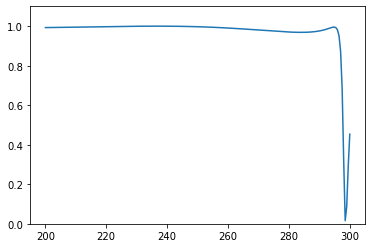

Test 6
True shape: [0.1782013  0.18042261 0.18737194 0.2        0.19753767 0.2       ]
Predicted shape: [[0.18033576 0.18241903 0.2246576  0.19586661 0.17982233 0.17585602]]



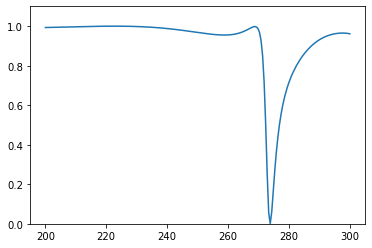

Test 7
True shape: [0.09876883 0.1        0.13169178 0.2        0.19753767 0.2       ]
Predicted shape: [[0.1131359  0.11322281 0.18555233 0.18519351 0.17115048 0.14392304]]



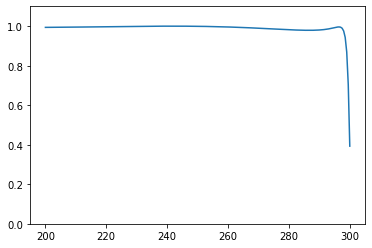

Test 8
True shape: [0.19753767 0.2        0.13169178 0.1        0.2        0.2       ]
Predicted shape: [[0.19786233 0.19391039 0.13352865 0.14984801 0.16919191 0.19936192]]



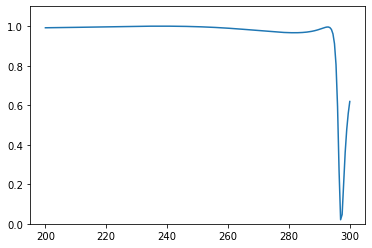

Test 9
True shape: [0.19753767 0.2        0.19507534 0.19507534 0.2        0.19753767]
Predicted shape: [[0.18662903 0.18990025 0.20110384 0.19724274 0.19769809 0.18880482]]



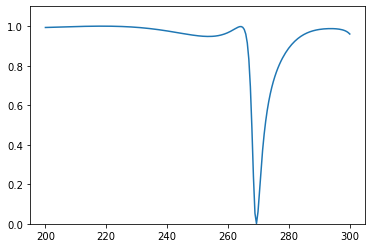

Test 10
True shape: [0.2        0.19507534 0.19507534 0.2        0.19258231 0.1902113 ]
Predicted shape: [[0.1827091  0.18657324 0.19997475 0.1924321  0.19589888 0.18795355]]



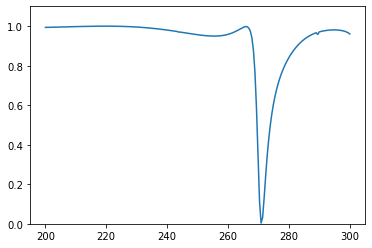

Test 11
True shape: [0.19753767 0.2        0.19753767 0.2        0.2        0.1       ]
Predicted shape: [[0.19144055 0.19863737 0.24890009 0.20808387 0.1304778  0.09894276]]



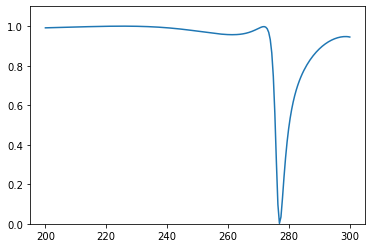

Test 12
True shape: [0.19753767 0.2        0.19753767 0.2        0.1        0.09876883]
Predicted shape: [[0.19954354 0.20196325 0.17381635 0.18213126 0.1441268  0.13015106]]



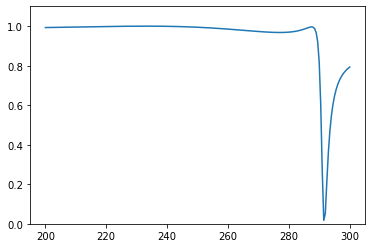

Test 13
True shape: [0.1902113  0.19258231 0.2        0.18737194 0.18042261 0.1782013 ]
Predicted shape: [[0.18314347 0.18753654 0.18582258 0.17429447 0.1917015  0.18229233]]



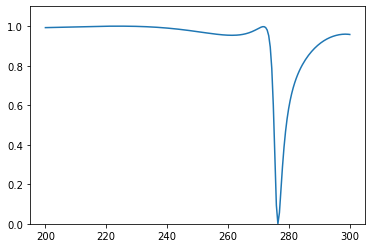

Test 14
True shape: [0.19753767 0.2        0.2        0.19753767 0.2        0.19753767]
Predicted shape: [[0.18392682 0.18654382 0.20650223 0.2047332  0.19838879 0.1876379 ]]



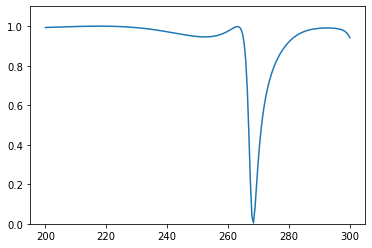

Test 15
True shape: [0.1902113  0.19258231 0.2        0.1        0.13169178 0.2       ]
Predicted shape: [[0.1322993  0.1364738  0.16613138 0.17407316 0.17010449 0.1526439 ]]



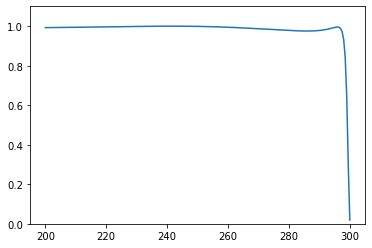

Test 16
True shape: [0.1        0.11723925 0.14600443 0.2        0.19258231 0.1902113 ]
Predicted shape: [[0.17966321 0.1842058  0.18858948 0.17418483 0.1257847  0.10597163]]



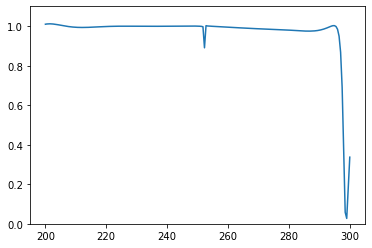

Test 17
True shape: [0.1        0.11044282 0.12680754 0.15329674 0.2        0.3       ]
Predicted shape: [[0.18154141 0.1815297  0.16117916 0.12343273 0.1737038  0.18429196]]



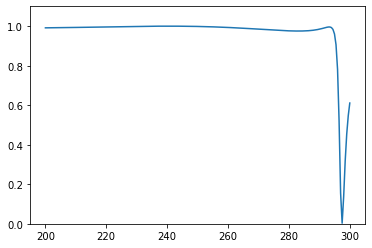

Test 18
True shape: [0.19753767 0.2        0.2        0.14600443 0.11723925 0.1       ]
Predicted shape: [[0.16876617 0.17391512 0.1800358  0.16784903 0.16594785 0.16888513]]



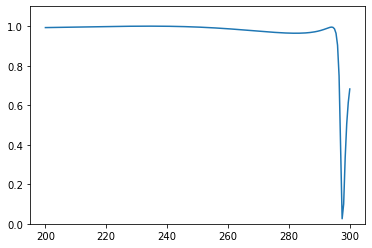

Test 19
True shape: [0.1902113  0.19258231 0.2        0.1        0.2        0.19753767]
Predicted shape: [[0.18999878 0.19519526 0.21608338 0.19422513 0.11354556 0.08758691]]



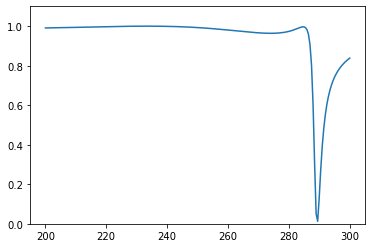

Test 20
True shape: [0.19753767 0.2        0.19753767 0.2        0.2        0.2       ]
Predicted shape: [[0.1901842  0.19356999 0.20683408 0.20425045 0.19648717 0.19100317]]



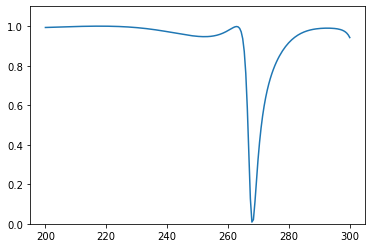

Test 21
True shape: [0.1902113  0.19258231 0.2        0.19753767 0.2        0.19753767]
Predicted shape: [[0.18516362 0.1887896  0.1970211  0.1915434  0.19702457 0.18817553]]



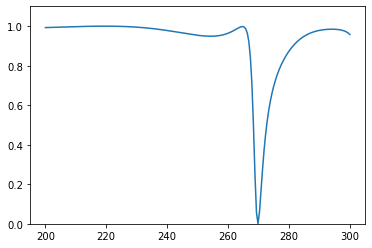

Test 22
True shape: [0.1782013  0.18042261 0.18737194 0.2        0.13169178 0.1       ]
Predicted shape: [[0.17313033 0.17785025 0.1236909  0.18351227 0.17386666 0.24497657]]



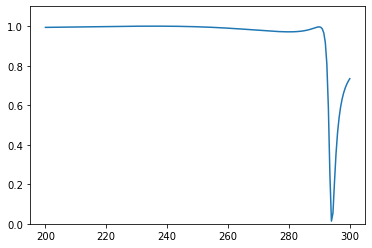

Test 23
True shape: [0.19753767 0.2        0.2        0.1        0.1        0.2       ]
Predicted shape: [[0.11254799 0.11254323 0.18539175 0.18496624 0.1709129  0.14358282]]



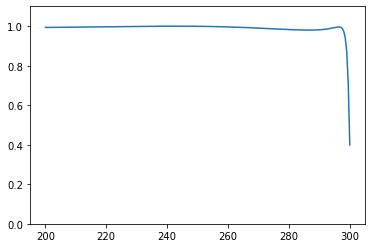

Test 24
True shape: [0.19753767 0.2        0.13169178 0.1        0.2        0.3       ]
Predicted shape: [[0.19098362 0.19234914 0.18088666 0.13648859 0.18714263 0.19465706]]



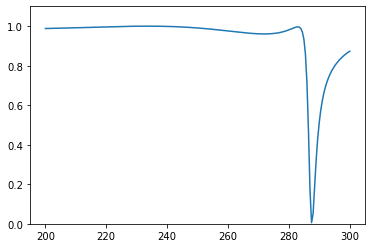

Test 25
True shape: [0.09876883 0.1        0.13169178 0.2        0.2        0.3       ]
Predicted shape: [[0.18600816 0.19112873 0.20723596 0.19434959 0.1350451  0.09925376]]



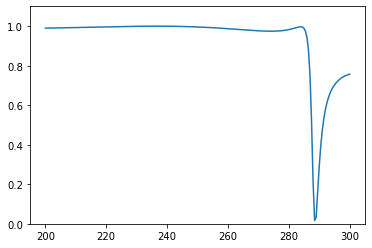

Test 26
True shape: [0.19753767 0.2        0.2        0.19753767 0.2        0.2       ]
Predicted shape: [[0.18551835 0.18840784 0.2064963  0.20458516 0.19718255 0.188312  ]]



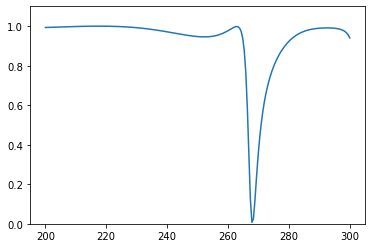

In [17]:
predicted = model.predict(np.reshape(test_X[0], (1, 200)))
x = np.genfromtxt('meep_code/data/SP_xaxis.txt')
for i in range(len(test_X)):
    print('Test '+str(i))
    print('True shape: ' + str(test_Y[i]))
    print('Predicted shape: ' + str(model.predict(np.reshape(test_X[i], (1, 200))))+'\n')
    plt.ylim(0, 1.1)
    plt.plot(x, np.subtract(test_X[i], -0.5))
    plt.show()
    if i == 0:
        continue
    predicted = np.concatenate((predicted, model.predict(np.reshape(test_X[0], (1, 200)))))

Train on 119 samples, validate on 30 samples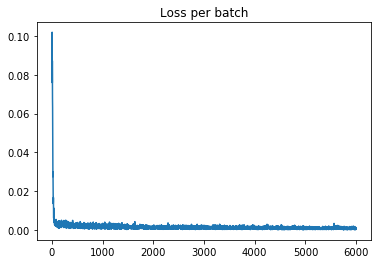